## 1. Unsupervised Machine Learning 

Unsupervised Machine learning is a series of techniques where the main goal is to reduce the dimensionality of the data. In unsupervised learning there are not outcome variables (y variable) only input variables (X).

Another important goal is to understand the underlying structure of the data which in turns will help to understand the data itself.

In here we will focus on Clustering Algorithms as there are widely use in multiple fields in statistics (not only in machine learning approaches), and because there are the starting point on data modeling.


![title](machine-learning-cheet-sheet.png)

Normally, unsupervised learning uses all of the data, not just a subset (training data) as the ultimate goal is to reduce dimensionality and understand the underlying behavior of the data.

[https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/](https://machinelearningmastery.com/a-tour-of-machine-learning-algorithms/)

### $A.$ Principal Component Analysis 

In principal component analysis the main goal is to use algebraic properties of high dimensionality data and reduce it to fewer dimensions but still maintaining the variance signal among the variables.

Principal component is one technique from the dimensionality reduction family. PCA has been extensively used due to its great flexibility, and general applicability. 

Here is a extensive figure of the multiple techniques for dimensionality Reduction.

![title](MachineLearningAlgorithms.png)

In many situations in a study, research or project there are many variables that carry little or not information or association with the purpose of the study. In other cases, there is high redundancy that makes difficult to parse and make sense of the overall structure of the data. There is also variable duplication and variables with error or outliers that make the data difficult to treat. It is generally a good practice to remove these variables to reduce the amount of noise they carry. 


PCA is a technique from a family of dimensionality reduction techniques called *singular value decomposition* (SVD). The basic idea for SVD is to rotate the coordinate axes in order to maximize the underlying variability of the model using a small number of variables.

The basic steps for a PCA are:

1. Generate a covariance matrix with all of the variables present in the model
    1a. If variables come from different levels of measurements, standarized all variables.
2. Calculate eigenvalues of the covariance matrix
3. Using the eigenvector matrix obtain variance explained on each component of the matrix
4. Order the variance from highest to lowest (principal components)
5. Calculate vector directionalty on each component for all variables.




1. In PCA and other Factor analysis the source of variation we will be measuring relies on the variance and covariance rather than the mean as we have seen in parametric methods. 

    There are two main types of variance that we will be using on this analysis 
    
    Common variance: shared variance across a set of items (highly correlated variables would carry high variance)
    
    Unique Variance: Portions of the variance that are not common between variables

2. Eigenvalues and eigenvector are the main variation units that will allow you to measure how much each variable contribute to the overall variation within your data. The idea is to decompose the common variance (in PCA, however other types of factor analysis will use the unique variance as well) into vectors in a multidimentional space.

When you have multiple variables you need to decompose the variation of each variable into linear components to be able to compare across variables, to do this you do linear transformation of each variable variation. Eigenvectors and eigenvalues are the resulting vectors from such linear transformation. 

The number of components to evaluate correspond to the number of variables you have in your analysis, and each the dimmension of the that decomposed vector matrix will be equal to the number of variables to evaluate.



This explanation is taken from (https://stats.idre.ucla.edu/spss/seminars/efa-spss/)[https://stats.idre.ucla.edu/spss/seminars/efa-spss/]

<b>Eigenvalues represent the total amount of variance that can be explained by a given principal component.</b>  They can be positive or negative in theory, but in practice they explain variance which is always positive.

If eigenvalues are greater than zero, then it’s a good sign.
Since variance cannot be negative, negative eigenvalues imply the model is ill-conditioned.
Eigenvalues close to zero imply there is item multicollinearity, since all the variance can be taken up by the first component.

Eigenvalues are also the sum of squared component loadings across all variables for each component, which represent the amount of variance in each variables that can be explained by the principal component.

<b>Eigenvectors represent a weight for each eigenvalue</b>. The eigenvector times the square root of the eigenvalue gives the component loadings which can be interpreted as the correlation of each item with the principal component.

for a better understanding we will follow an example given by the UC Business Analytics R Programming Guide [http://uc-r.github.io/pca](http://uc-r.github.io/pca) 
And if we have time we will follow an case example to better understand the practical applications of the unsupervised learning techniques.


We will be using the dataset USAarrests that contains four variables that represent the number of arrests per 100,000 residents for Assault, Murder, and Rape in each of the fifty US states in 1973. The data set also contains the percentage of the population living in urban areas, UrbanPop.


In [1]:
library(tidyverse)  # data manipulation and visualization
library(gridExtra)  # plot arrangement

data("USArrests")
#glimpse(USArrests)
head(USArrests, 10)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




,Murder,Assault,UrbanPop,Rape
,<dbl>,<int>,<int>,<dbl>
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6
Colorado,7.9,204,78,38.7
Connecticut,3.3,110,77,11.1
Delaware,5.9,238,72,15.8
Florida,15.4,335,80,31.9


In [2]:
##Lets standardize each variable to avoid inflation from variable with different units of measurement

apply(USArrests, 2, var)
scaled_df <- apply(USArrests, 2, scale)
head(scaled_df)

Murder    Assault   UrbanPop       Rape 
  18.97047 6945.16571  209.51878   87.72916

Murder,Assault,UrbanPop,Rape
1.24256408,0.7828393,-0.5209066,-0.003416473
0.50786248,1.1068225,-1.2117642,2.484202941
0.07163341,1.4788032,0.9989801,1.042878388
0.23234938,0.2308680,-1.0735927,-0.184916602
0.27826823,1.2628144,1.7589234,2.067820292
0.02571456,0.3988593,0.8608085,1.864967207


In [3]:
?scale
##Remember variable standardization using z_scores

As mentioned before the goal of a PCA is to reduce the number of dimensions in the data structure by maximixing the variance on each linear combination of variables and ranking on these combinations from higher variance to lower variance.

The first component is the one that include the largest variance across all features. The second principal component, contains the second largest variance and that is uncorrelated with PC1. 

The elements for each PC are notated as:

$Z1 = \theta_{11}X_1 + \theta_{21}X_2 + ... + \theta_{p1}X_p  $

where all $\theta$ are the loadings of the principal components (something similar to coefficients but in an aggregate value across all features)

We need to calculate the loadings vector that maximizes the variance. To achieve this we calculate the eigenvector from the largest eigenvalue of the covariance matrix. 

In [4]:
# Calculate eigenvalues & eigenvectors
arrests.cov <- cov(scaled_df)
arrests.eigen <- eigen(arrests.cov)
str(arrests.eigen)

List of 2
 $ values : num [1:4] 2.48 0.99 0.357 0.173
 $ vectors: num [1:4, 1:4] -0.536 -0.583 -0.278 -0.543 0.418 ...
 - attr(*, "class")= chr "eigen"


The values correspond to the eigenvalues for each component and the vectors the loadings (eigenvectors for each component and for each feature)

We can extract the loadings for the first two Principal components (PC1 and PC2). By default R gives the sign of the loading in the negative direction, depending of the type of data we might want to change it to a positive direction.



In [5]:
(phi <- arrests.eigen$vectors[,1:2])
phi <- -phi
row.names(phi) <- c("Murder", "Assault", "UrbanPop", "Rape")
colnames(phi) <- c("PC1", "PC2")
phi ##What do these values mean??

-0.5358995,0.4181809
-0.5831836,0.1879856
-0.2781909,-0.8728062
-0.5434321,-0.1673186


,PC1,PC2
Murder,0.5358995,-0.4181809
Assault,0.5831836,-0.1879856
UrbanPop,0.2781909,0.8728062
Rape,0.5434321,0.1673186


#### Remember principal components are unrelated across, which means that each component is their own feature (variable space).

If we project the n data points x1,x2...xn onto the first eigenvector, the projected values are called the principal component scores for each observation.

In [6]:
PC1 <- as.matrix(scaled_df) %*% phi[,1]
PC2 <- as.matrix(scaled_df) %*% phi[,2]

# Create data frame with Principal Components scores
PC <- data.frame(State = row.names(USArrests), PC1, PC2)
head(PC)

,State,PC1,PC2
,<fct>,<dbl>,<dbl>
1,Alabama,0.9756604,-1.1220012
2,Alaska,1.9305379,-1.0624269
3,Arizona,1.7454429,0.7384595
4,Arkansas,-0.1399989,-1.1085423
5,California,2.4986128,1.5274267
6,Colorado,1.4993407,0.9776297


Lets plot now the scores on the first two principal components in order to better analyze the patterns given on each component

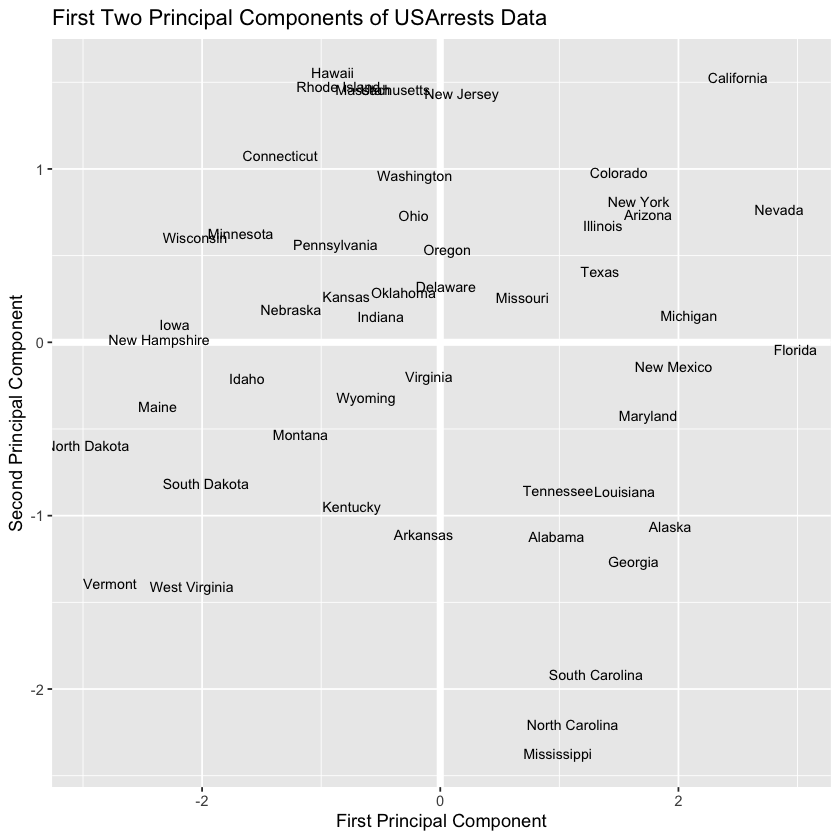

In [7]:
library(ggplot2)
# Plot Principal Components for each State
ggplot(PC, aes(PC1, PC2)) + 
  modelr::geom_ref_line(h = 0) +
  modelr::geom_ref_line(v = 0) +
  geom_text(aes(label = State), size = 3) +
  xlab("First Principal Component") + 
  ylab("Second Principal Component") + 
  ggtitle("First Two Principal Components of USArrests Data")

### After an initial inspection of the data we need to define how many components we need to extract to account for most of the variation of the data.

We can the proportion of the variation from each component by dividing each eigenvalue by the total number of principal components 

In [8]:
PVE <- arrests.eigen$values / sum(arrests.eigen$values)
round(PVE, 2)

[1] 0.62 0.25 0.09 0.04

In [9]:
# PVE (aka scree) plot
PVEplot <- qplot(c(1:4), PVE) + 
  geom_line() + 

  xlab("Principal Component") + 
  ylab("PVE") +
  ggtitle("Scree Plot") +
  ylim(0, 1)

# Cumulative PVE plot
cumPVE <- qplot(c(1:4), cumsum(PVE)) + 
  geom_line() + 
  xlab("Principal Component") + 
  ylab(NULL) + 
  ggtitle("Cumulative Scree Plot") +
  ylim(0,1)

grid.arrange(PVEplot, cumPVE, ncol = 2)

ERROR: Error in grid.arrange(PVEplot, cumPVE, ncol = 2): could not find function "grid.arrange"


In R there are many packages that can be used to run PCA that generate very nice visuals and more information than given in here. You can continue the tutorial given in [http://uc-r.github.io/pca](http://uc-r.github.io/pca) that uses the function prcomp from the base package.

Other packages that have PCA analysis are (see [http://www.gastonsanchez.com/visually-enforced/how-to/2012/06/17/PCA-in-R/](http://www.gastonsanchez.com/visually-enforced/how-to/2012/06/17/PCA-in-R/) for more details:

-  prcomp() (stats)
-  princomp() (stats)
-  PCA() (FactoMineR)
-  dudi.pca() (ade4)
-  acp() (amap)
